# Análisis de datos de una ETAP
Este notebook se usará para analizar el funcionamiento de una estación potabilizadora de agua para el Proyecto Final de Master.

### Importación de librerias y datos

Se importan las distintas librerias que se usaran para estudiar los datos. Los datos que estudiaremos consisten en los datos sacados de la ETAP y datos climatologicos de la zona. Estos datos se encuentran en dos excels distintos que hemos cargado previamente en un repositorio Git.

### Importación librerias

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns;

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Importación datos climatologicos

In [ ]:
df_c = pd.read_excel('https://raw.githubusercontent.com/marcbonastre/ProjecteTFM/main/ClimateData/BCN_Climate_Data.xlsx',header=0)
df_c.head()

,fecha,indicativo,nombre,provincia,altitud,tmed,prec,tmin,horatmin,tmax,horatmax,dir,velmedia,racha,horaracha
0,2018-01-01,0201D,BARCELONA,BARCELONA,6,12.8,0.0,10.2,07:40:00,15.5,19:30:00,31.0,4.2,18.1,10:30:00
1,2018-01-02,0201D,BARCELONA,BARCELONA,6,14.6,0.0,11.4,09:50:00,17.8,14:30:00,30.0,3.3,10.3,07:50:00
2,2018-01-03,0201D,BARCELONA,BARCELONA,6,17.9,0.0,14.0,03:40:00,21.8,15:00:00,31.0,3.9,18.3,23:10:00
3,2018-01-04,0201D,BARCELONA,BARCELONA,6,19.2,0.0,16.4,23:59:00,21.9,14:50:00,31.0,5.0,20.0,04:20:00
4,2018-01-05,0201D,BARCELONA,BARCELONA,6,16.4,0.0,13.7,23:59:00,19.2,13:40:00,30.0,3.3,13.3,09:50:00


In [ ]:
df_c = df_c.drop(columns=['indicativo', 'nombre', 'provincia', 'altitud', 'horaracha'])
df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1596 entries, 0 to 1595
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   fecha     1596 non-null   datetime64[ns]
 1   tmed      1585 non-null   float64       
 2   prec      1593 non-null   float64       
 3   tmin      1585 non-null   float64       
 4   horatmin  1582 non-null   object        
 5   tmax      1585 non-null   float64       
 6   horatmax  1585 non-null   object        
 7   dir       1590 non-null   float64       
 8   velmedia  1593 non-null   float64       
 9   racha     1590 non-null   float64       
dtypes: datetime64[ns](1), float64(7), object(2)
memory usage: 124.8+ KB


In [ ]:
df_c.shape

(1596, 10)

In [ ]:
df_c

,fecha,tmed,prec,tmin,horatmin,tmax,horatmax,dir,velmedia,racha
0,2018-01-01,12.8,0.0,10.2,07:40:00,15.5,19:30:00,31.0,4.2,18.1
1,2018-01-02,14.6,0.0,11.4,09:50:00,17.8,14:30:00,30.0,3.3,10.3
2,2018-01-03,17.9,0.0,14.0,03:40:00,21.8,15:00:00,31.0,3.9,18.3
3,2018-01-04,19.2,0.0,16.4,23:59:00,21.9,14:50:00,31.0,5.0,20.0
4,2018-01-05,16.4,0.0,13.7,23:59:00,19.2,13:40:00,30.0,3.3,13.3
...,...,...,...,...,...,...,...,...,...,...
1591,2022-05-11,18.9,0.0,15.9,03:40:00,21.9,11:50:00,21.0,5.3,11.4
1592,2022-05-12,18.1,0.0,15.4,05:00:00,20.8,15:50:00,21.0,2.5,6.4
1593,2022-05-13,17.6,0.0,14.2,04:50:00,21.1,13:00:00,4.0,1.9,4.7
1594,2022-05-14,18.4,0.0,15.5,01:00:00,21.4,07:10:00,21.0,2.5,6.7


### Importación datos ETAP

In [ ]:
df_p = pd.read_excel('https://raw.githubusercontent.com/marcbonastre/ProjecteTFM/main/PlantData/DataPlanta.xlsx',header=0)
df_p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1096 entries, 0 to 1095
Data columns (total 51 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   StartDateTime  1096 non-null   datetime64[ns]
 1   cMinP5         1096 non-null   object        
 2   cMaxP5         1096 non-null   object        
 3   cMedP5         1096 non-null   object        
 4   cStdDevP5      1096 non-null   object        
 5   cAcumP5        1096 non-null   float64       
 6   iMinP5         1096 non-null   object        
 7   iMaxP5         1096 non-null   object        
 8   iMedP5         1096 non-null   object        
 9   iStdDevP5      1096 non-null   object        
 10  iAcumP5        1096 non-null   float64       
 11  nMinP5         1096 non-null   object        
 12  nMaxP5         1096 non-null   object        
 13  nMedP5         1096 non-null   object        
 14  nStdDevP5      1096 non-null   object        
 15  nAcumP5        1096 n

In [ ]:
df_p.shape

(1096, 51)

La mayoria de columnas están en formato string y las pasaremos a formato float.
Para ello los campos que aparecen como (null) los vamos a convertir a 0. Un ejemplo de ello es la línea 670 que se muestra a continuación.

In [ ]:
df_date = df_p['StartDateTime']
df_date.head()

0   2018-07-01
1   2018-07-02
2   2018-07-03
3   2018-07-04
4   2018-07-05
Name: StartDateTime, dtype: datetime64[ns]

In [ ]:
df_p = df_p.drop(columns=['StartDateTime'])

In [ ]:
df_p = df_p.replace('(null)',np.nan).astype(float)

In [ ]:
df_p = df_p.replace(np.nan, 0, regex=True)

In [ ]:
df_p = df_p.astype(float)
print(df_p.dtypes)

cMinP5          float64
cMaxP5          float64
cMedP5          float64
cStdDevP5       float64
cAcumP5         float64
iMinP5          float64
iMaxP5          float64
iMedP5          float64
iStdDevP5       float64
iAcumP5         float64
nMinP5          float64
nMaxP5          float64
nMedP5          float64
nStdDevP5       float64
nAcumP5         float64
cMinP3A         float64
cMaxP3A         float64
cMedP3A         float64
cStdDev3A       float64
cAcumP3A        float64
iMinP3A         float64
iMaxP3A         float64
iMedP3A         float64
iStdDevP3A      float64
iAcumP3A        float64
nMinP3A         float64
nMaxP3A         float64
nMedP3A         float64
nStdDevP3A      float64
nAcumP3A        float64
cMinOsm1        float64
cMaxOsm1        float64
cMedOsm1        float64
cStdDevOsm1     float64
cAcumOsm1       float64
cMinOsm2        float64
cMaxOsm2        float64
cMedOsm2        float64
cStdDevOsm2     float64
cAcumOsm2       float64
cMinXarxa       float64
cMaxXarxa       

In [ ]:
df_p['fecha'] = df_date

In [ ]:
cols = df_p.columns.tolist()

In [ ]:
cols = cols[-1:] + cols[:-1]

In [ ]:
df_p = df_p[cols]
df_p.head()

,fecha,cMinP5,cMaxP5,cMedP5,cStdDevP5,cAcumP5,iMinP5,iMaxP5,iMedP5,iStdDevP5,...,cMinXarxa,cMaxXarxa,cMedXarxa,cStdDevXarxa,cAcumXarxa,nMinDAT,nMaxDAT,nMedDAT,nStdDevDAT,nAcumDAT
0,2018-07-01,0.017714,0.160076,0.078702,0.020036,6.799870e+03,6.047665,6.242940,6.137350,0.027208,...,0.313976,0.488993,0.368834,0.022813,3.186722e+04,1.629042,2.507601,2.067384,0.255408,178621.9944
1,2018-07-02,0.025793,0.176830,0.078613,0.019855,6.792178e+03,3.251875,6.237294,6.119859,0.147992,...,0.316075,106.134499,32.603393,46.297438,2.816933e+06,1.089986,4.000413,2.232474,1.055170,192885.7949
2,2018-07-03,0.018012,0.168538,0.079260,0.019953,6.848064e+03,3.199921,6.245677,6.103773,0.193496,...,0.324669,116.307419,93.308118,30.434838,8.061821e+06,2.384308,3.781869,3.219666,0.354915,278179.1587
3,2018-07-04,0.021495,0.185587,0.078983,0.019676,6.824161e+03,3.447623,6.240104,6.127801,0.070658,...,0.319673,102.047852,3.301251,13.434774,2.852281e+05,2.540326,4.000802,3.684108,0.221335,318306.9214
4,2018-07-05,0.023954,146.610626,72.006054,64.380338,6.221323e+06,6.047152,208.132645,116.602040,98.829526,...,0.322901,286.139984,40.234146,49.825661,3.476230e+06,2.496724,4.002477,3.369862,0.409823,291156.0714


In [ ]:
print(df_p.loc[[670]])

         fecha  cMinP5  cMaxP5  cMedP5  cStdDevP5  cAcumP5  iMinP5  iMaxP5  \
670 2020-05-01     0.0     0.0     0.0        0.0      0.0     0.0     0.0   

     iMedP5  iStdDevP5  ...  cMinXarxa  cMaxXarxa  cMedXarxa  cStdDevXarxa  \
670     0.0        0.0  ...   0.180545   0.512797   0.386632       0.05073   

     cAcumXarxa   nMinDAT  nMaxDAT   nMedDAT  nStdDevDAT     nAcumDAT  
670  33405.0128  0.203903  0.20727  0.205696    0.000448  17772.09572  

[1 rows x 51 columns]


In [ ]:
df_p["fecha"] = df_p['fecha'].astype("datetime64")
df_p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1096 entries, 0 to 1095
Data columns (total 51 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   fecha         1096 non-null   datetime64[ns]
 1   cMinP5        1096 non-null   float64       
 2   cMaxP5        1096 non-null   float64       
 3   cMedP5        1096 non-null   float64       
 4   cStdDevP5     1096 non-null   float64       
 5   cAcumP5       1096 non-null   float64       
 6   iMinP5        1096 non-null   float64       
 7   iMaxP5        1096 non-null   float64       
 8   iMedP5        1096 non-null   float64       
 9   iStdDevP5     1096 non-null   float64       
 10  iAcumP5       1096 non-null   float64       
 11  nMinP5        1096 non-null   float64       
 12  nMaxP5        1096 non-null   float64       
 13  nMedP5        1096 non-null   float64       
 14  nStdDevP5     1096 non-null   float64       
 15  nAcumP5       1096 non-null   float64 

### Union datos planta y clima

In [ ]:
df_c['fecha']

0      2018-01-01
1      2018-01-02
2      2018-01-03
3      2018-01-04
4      2018-01-05
          ...    
1591   2022-05-11
1592   2022-05-12
1593   2022-05-13
1594   2022-05-14
1595   2022-05-15
Name: fecha, Length: 1596, dtype: datetime64[ns]

In [ ]:
df_p['fecha']

0      2018-07-01
1      2018-07-02
2      2018-07-03
3      2018-07-04
4      2018-07-05
          ...    
1091   2021-06-26
1092   2021-06-27
1093   2021-06-28
1094   2021-06-29
1095   2021-06-30
Name: fecha, Length: 1096, dtype: datetime64[ns]

In [ ]:
df_c = df_c.loc[(df_c["fecha"] >= "2018-07-01") & (df_c["fecha"] <= "2021-06-30")]
df_c

,fecha,tmed,prec,tmin,horatmin,tmax,horatmax,dir,velmedia,racha
181,2018-07-01,24.1,0.0,21.4,04:50:00,26.8,13:20:00,9.0,3.1,5.8
182,2018-07-02,24.7,0.0,22.0,04:00:00,27.4,10:40:00,13.0,2.8,6.7
183,2018-07-03,25.1,0.0,22.9,05:20:00,27.3,12:30:00,20.0,3.9,8.6
184,2018-07-04,25.0,0.0,22.0,04:30:00,28.0,13:00:00,22.0,2.8,6.4
185,2018-07-05,25.0,0.0,22.9,04:40:00,27.2,07:50:00,22.0,5.0,11.4
...,...,...,...,...,...,...,...,...,...,...
1272,2021-06-26,22.8,0.0,20.3,02:50:00,25.2,15:40:00,20.0,5.0,10.0
1273,2021-06-27,23.4,0.0,20.8,05:00:00,25.9,14:00:00,20.0,2.8,6.7
1274,2021-06-28,23.1,NaN,20.3,04:30:00,25.9,11:30:00,9.0,3.3,8.9
1275,2021-06-29,23.4,0.0,21.5,03:50:00,25.2,09:20:00,14.0,4.2,11.1


In [ ]:
index = pd.Index(range(0, 1096, 1))
df_c = df_c.set_index(index)
df_c

,fecha,tmed,prec,tmin,horatmin,tmax,horatmax,dir,velmedia,racha
0,2018-07-01,24.1,0.0,21.4,04:50:00,26.8,13:20:00,9.0,3.1,5.8
1,2018-07-02,24.7,0.0,22.0,04:00:00,27.4,10:40:00,13.0,2.8,6.7
2,2018-07-03,25.1,0.0,22.9,05:20:00,27.3,12:30:00,20.0,3.9,8.6
3,2018-07-04,25.0,0.0,22.0,04:30:00,28.0,13:00:00,22.0,2.8,6.4
4,2018-07-05,25.0,0.0,22.9,04:40:00,27.2,07:50:00,22.0,5.0,11.4
...,...,...,...,...,...,...,...,...,...,...
1091,2021-06-26,22.8,0.0,20.3,02:50:00,25.2,15:40:00,20.0,5.0,10.0
1092,2021-06-27,23.4,0.0,20.8,05:00:00,25.9,14:00:00,20.0,2.8,6.7
1093,2021-06-28,23.1,NaN,20.3,04:30:00,25.9,11:30:00,9.0,3.3,8.9
1094,2021-06-29,23.4,0.0,21.5,03:50:00,25.2,09:20:00,14.0,4.2,11.1


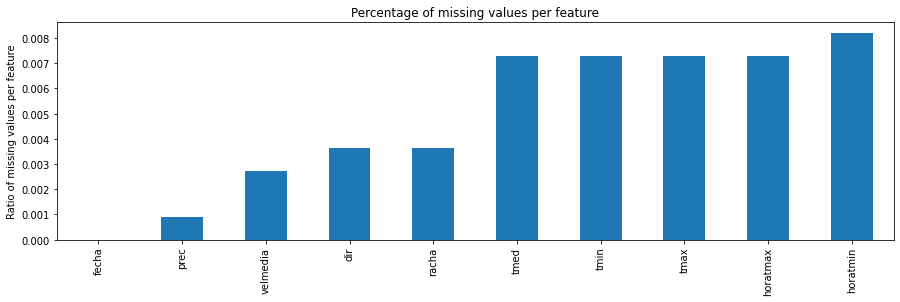

In [ ]:
df_c.isna().mean().sort_values().plot(
    kind="bar", figsize=(15, 4),
    title="Percentage of missing values per feature",
    ylabel="Ratio of missing values per feature");

In [ ]:
dfc_num = df_c.select_dtypes(include='number')
dfc_num.head()

,tmed,prec,tmin,tmax,dir,velmedia,racha
0,24.1,0.0,21.4,26.8,9.0,3.1,5.8
1,24.7,0.0,22.0,27.4,13.0,2.8,6.7
2,25.1,0.0,22.9,27.3,20.0,3.9,8.6
3,25.0,0.0,22.0,28.0,22.0,2.8,6.4
4,25.0,0.0,22.9,27.2,22.0,5.0,11.4


In [ ]:
dfc_num.loc[dfc_num['tmed'].isna()==True]

,tmed,prec,tmin,tmax,dir,velmedia,racha
109,NaN,4.8,NaN,NaN,8.0,4.2,14.2
110,NaN,15.5,NaN,NaN,8.0,5.6,12.8
265,NaN,0.0,NaN,NaN,24.0,3.3,8.6
330,NaN,0.0,NaN,NaN,21.0,4.2,10.0
350,NaN,0.0,NaN,NaN,22.0,4.4,10.0
475,NaN,0.1,NaN,NaN,22.0,3.3,9.7
476,NaN,0.0,NaN,NaN,22.0,5.0,12.2
1089,NaN,0.0,NaN,NaN,99.0,3.6,6.7


In [ ]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2, weights="uniform")
imputed_data = imputer.fit_transform(dfc_num)

df1_imputed = pd.DataFrame(imputed_data,columns=dfc_num.columns)
df1_imputed.loc[dfc_num['tmed'].isna()==True]

,tmed,prec,tmin,tmax,dir,velmedia,racha
109,11.80,4.8,9.40,14.15,8.0,4.2,14.2
110,10.85,15.5,9.25,12.50,8.0,5.6,12.8
265,22.30,0.0,18.95,25.75,24.0,3.3,8.6
330,18.80,0.0,15.40,22.25,21.0,4.2,10.0
350,23.30,0.0,20.40,26.30,22.0,4.4,10.0
475,13.65,0.1,10.55,16.75,22.0,3.3,9.7
476,17.20,0.0,13.85,20.55,22.0,5.0,12.2
1089,22.80,0.0,20.05,25.50,99.0,3.6,6.7


In [ ]:
df_c['tmed'] = df1_imputed['tmed']
df_c['prec'] = df1_imputed['prec']
df_c['tmin'] = df1_imputed['tmin']
df_c['tmax'] = df1_imputed['tmax']
df_c['dir'] = df1_imputed['dir']
df_c['velmedia'] = df1_imputed['velmedia']
df_c['racha'] = df1_imputed['racha']

In [ ]:
df_c.describe()

,tmed,prec,tmin,tmax,dir,velmedia,racha
count,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000
mean,17.403923,1.608850,14.300502,20.509626,24.650091,3.568157,9.603786
std,5.613022,6.740969,5.832010,5.543106,21.367069,1.599219,3.546165
min,4.900000,0.000000,2.000000,7.400000,1.000000,0.000000,3.900000
25%,12.700000,0.000000,9.500000,15.800000,11.000000,2.500000,7.200000
50%,16.200000,0.000000,13.350000,19.300000,21.000000,3.300000,8.900000
75%,22.500000,0.000000,19.500000,25.500000,28.000000,4.200000,11.100000
max,30.000000,83.900000,27.100000,35.200000,99.000000,18.300000,29.400000


In [ ]:
df = pd.merge(df_c, df_p, on='fecha', how='outer')

### Analisis Producción

In [ ]:
#Importar llibreries per representació gràfica
import matplotlib.pyplot as plt
import seaborn as sns;

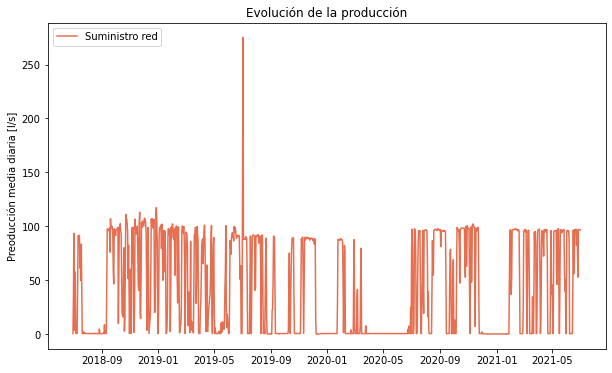

In [ ]:
fig = plt.figure(figsize=(10,6))

ax = sns.lineplot(x="fecha", y="cMedXarxa", color='#E76F51', data=df, label='Suministro red')

ax.set_title("Evolución de la producción")
ax.set_xlabel('')
ax.set_ylabel('Preoducción media diaria [l/s]')
ax.legend(loc='upper left')


In [ ]:
dfcMedXar = df['cMedXarxa']
dfcMedXar.idxmax()

367

In [ ]:
print(df.loc[[367]])

         fecha  tmed  prec  tmin  horatmin  tmax  horatmax   dir  velmedia  \
367 2019-07-03  25.7   0.0  22.2  03:30:00  29.2  09:30:00  99.0       2.5   

     racha  ...  cMinXarxa   cMaxXarxa   cMedXarxa  cStdDevXarxa   cAcumXarxa  \
367    5.0  ...    0.32922  514.843506  275.151689    213.340264  23773105.91   

      nMinDAT   nMaxDAT  nMedDAT  nStdDevDAT     nAcumDAT  
367  2.482438  3.884693  3.29576    0.336911  284753.6348  

[1 rows x 60 columns]


In [ ]:
df=df.drop([367])

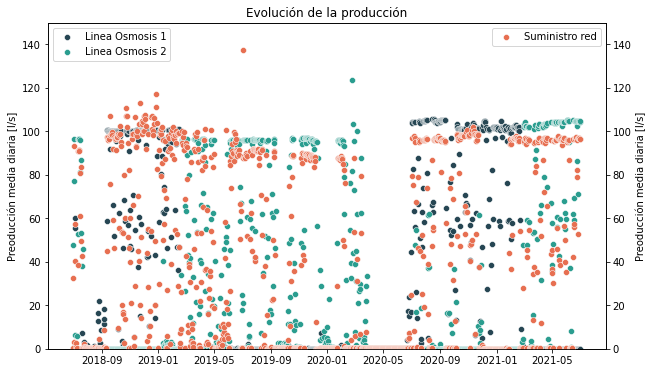

In [ ]:
fig = plt.figure(figsize=(10,6))

ax = sns.scatterplot(x="fecha", y="cMedOsm1", color='#264653', data=df, label='Linea Osmosis 1')
ax = sns.scatterplot(x="fecha", y="cMedOsm2", color='#2A9D8F', data=df, label='Linea Osmosis 2')

# Adding Twin Axes
ax2 = ax.twinx() 
ax2 = sns.scatterplot(x="fecha", y="cMedXarxa", color='#E76F51', data=df, label='Suministro red')

ax.set_title("Evolución de la producción")
ax.set_xlabel('')
ax.set_ylabel('Preoducción media diaria [l/s]')
ax.legend(loc='upper left')
ax.axis([None, None, 0, 150])

ax2.set_xlabel('')
ax2.set_ylabel('Preoducción media diaria [l/s]')
ax2.legend(loc='upper right')
ax2.axis([None, None, 0, 150])
plt.show()



<Figure size 1440x1800 with 0 Axes>

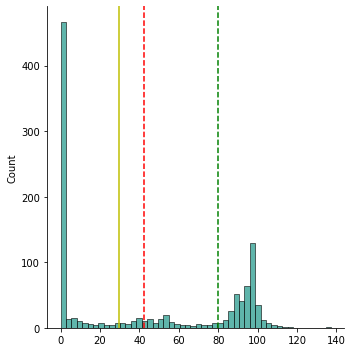

In [ ]:
media_prod = df['cMedXarxa'].mean()
mediana_prod = df['cMedXarxa'].median()

fig = plt.figure(figsize=(20,25))

ax=sns.displot(df["cMedXarxa"].values,bins=50, color='#2A9D8F', label='Suministro [l/s]')

plt.axvline(media_prod, color="r", linestyle="--");
plt.axvline(mediana_prod, color="y", linestyle="-");
plt.axvline(80, color="g", linestyle="--");

In [ ]:
p80 = df.loc[df['cMedXarxa']>80].shape[0]
p1 = df.loc[df['cMedXarxa']<1].shape[0]
cmin = df.loc[df['cMinXarxa']<1].shape[0]
cminSinAfect = df.loc[(df['cMinXarxa']<1) & (df['cMedXarxa']>80)].shape[0]
cortes = cmin-p1
dias = df.shape[0]
diasSinCortes = dias - cmin

print('De un total de {} dias, {} dias se suministran de media más de 80l/s.'.format(dias, p80))
print('Además hay {} dias que se suministran menos de 1l/s, con lo cual se puede entender que la planta ha estado parada por mantenimiento o por fallo.'.format(p1))
print('Teniendo en cuenta el caudal mínimo de cada dia vemos que en {} dias ha habido algún corte, de los cuales en {} no ha afectado a la media de 80l/s.'.format(cortes,cminSinAfect))
print('Únicamente en {} dias se ha suministrado agua sin ningún corte.'.format(diasSinCortes))

De un total de 1095 dias, 391 dias se suministran de media más de 80l/s.
Además hay 449 dias que se suministran menos de 1l/s, con lo cual se puede entender que la planta ha estado parada por mantenimiento o por fallo.
Teniendo en cuenta el caudal mínimo de cada dia vemos que en 565 dias ha habido algún corte, de los cuales en 315 no ha afectado a la media de 80l/s.
Únicamente en 81 dias se ha suministrado agua sin ningún corte.


In [ ]:
df['cMedOsm'] = df['cMedOsm1'] + df['cMedOsm2']
df['iMedOsm'] = df['iMedP5'] + df['iMedP3A']
df['iMedOsm80'] = df['iMedOsm'] * 0.8

In [ ]:
df_2 = df.loc[(df["fecha"] >= "2020-05-30") & (df["fecha"] <= "2021-06-01")]

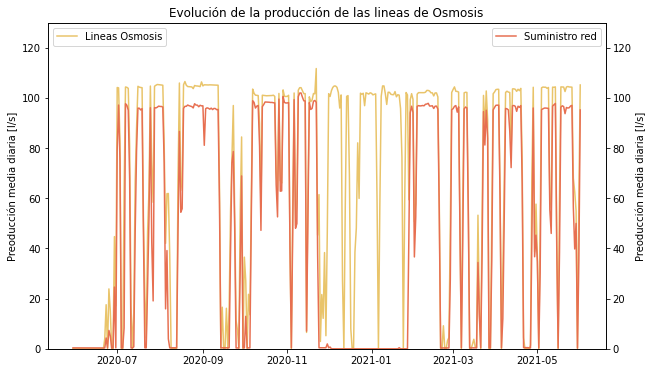

In [ ]:
fig = plt.figure(figsize=(10,6))

ax = sns.lineplot(x="fecha", y="cMedOsm", color='#E9C46A', data=df_2, label='Lineas Osmosis')

# Adding Twin Axes
ax2 = ax.twinx() 
ax2 = sns.lineplot(x="fecha", y="cMedXarxa", color='#E76F51', data=df_2, label='Suministro red')

# Add label

ax.set_title("Evolución de la producción de las lineas de Osmosis")
ax.set_xlabel('')
ax.set_ylabel('Preoducción media diaria [l/s]')
ax.legend(loc='upper left')
ax.axis([None, None, 0, 130])

ax2.set_xlabel('')
ax2.set_ylabel('Preoducción media diaria [l/s]')
ax2.legend(loc='upper right')
ax2.axis([None, None, 0, 130])

plt.show()

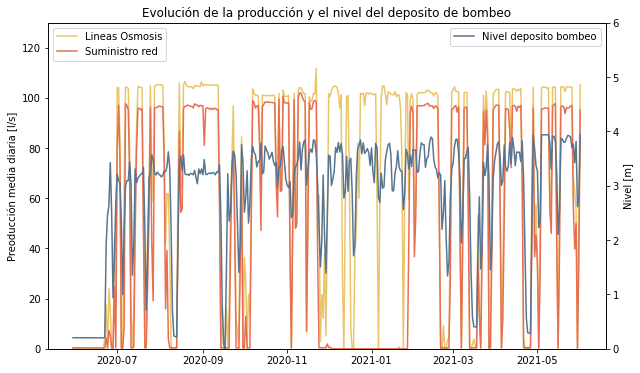

In [ ]:
fig = plt.figure(figsize=(10,6))

ax = sns.lineplot(x="fecha", y="cMedOsm", color='#E9C46A', data=df_2, label='Lineas Osmosis')
ax = sns.lineplot(x="fecha", y="cMedXarxa", color='#E76F51', data=df_2, label='Suministro red')

# Adding Twin Axes
ax2 = ax.twinx() 
ax2 = sns.lineplot(x="fecha", y="nMedDAT", color='#577590', data=df_2, label='Nivel deposito bombeo')

# Add label

ax.set_title("Evolución de la producción y el nivel del deposito de bombeo")
ax.set_xlabel('')
ax.set_ylabel('Preoducción media diaria [l/s]')
ax.legend(loc='upper left')
ax.axis([None, None, 0, 130])

ax2.set_xlabel('')
ax2.set_ylabel('Nivel [m]')
ax2.legend(loc='upper right')
ax2.axis([None, None, 0, 6])

plt.show()

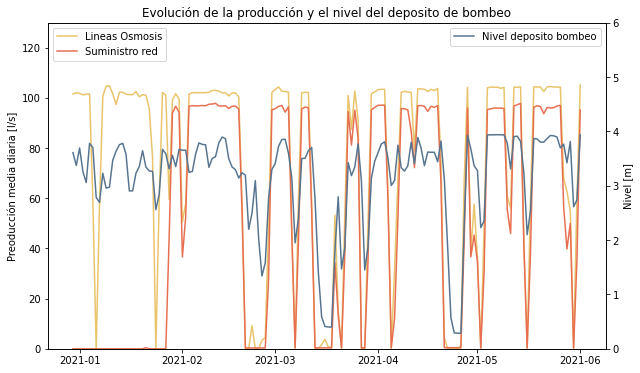

In [ ]:
df_3 = df.loc[(df["fecha"] >= "2020-12-30") & (df["fecha"] <= "2021-06-01")]

fig = plt.figure(figsize=(10,6))

ax = sns.lineplot(x="fecha", y="cMedOsm", color='#E9C46A', data=df_3, label='Lineas Osmosis')
ax = sns.lineplot(x="fecha", y="cMedXarxa", color='#E76F51', data=df_3, label='Suministro red')

# Adding Twin Axes
ax2 = ax.twinx() 
ax2 = sns.lineplot(x="fecha", y="nMedDAT", color='#577590', data=df_3, label='Nivel deposito bombeo')

# Add label

ax.set_title("Evolución de la producción y el nivel del deposito de bombeo")
ax.set_xlabel('')
ax.set_ylabel('Preoducción media diaria [l/s]')
ax.legend(loc='upper left')
ax.axis([None, None, 0, 130])

ax2.set_xlabel('')
ax2.set_ylabel('Nivel [m]')
ax2.legend(loc='upper right')
ax2.axis([None, None, 0, 6])

plt.show()

### Analisis Pozos

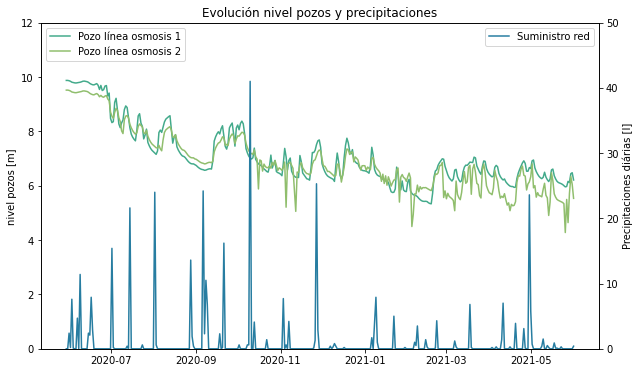

In [ ]:
fig = plt.figure(figsize=(10,6))

ax = sns.lineplot(x="fecha", y="nMedP5", color='#43AA8B', data=df_2, label='Pozo línea osmosis 1')
ax = sns.lineplot(x="fecha", y="nMedP3A", color='#90BE6D', data=df_2, label='Pozo línea osmosis 2')

# Adding Twin Axes
ax2 = ax.twinx() 
ax2 = sns.lineplot(x="fecha", y="prec", color='#277DA1', data=df_2, label='Suministro red')

# Add label

ax.set_title("Evolución nivel pozos y precipitaciones")
ax.set_xlabel('')
ax.set_ylabel('nivel pozos [m]')
ax.legend(loc='upper left')
ax.axis([None, None, 0, 12])

ax2.set_xlabel('')
ax2.set_ylabel('Precipitaciones diárias [l]')
ax2.legend(loc='upper right')
ax2.axis([None, None, 0, 50])

plt.show()

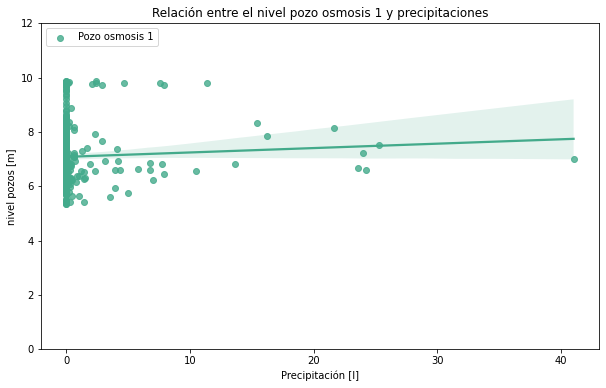

In [ ]:
fig = plt.figure(figsize=(10,6))

ax = sns.regplot(x="prec", y="nMedP5", color='#43AA8B', data=df_2, label='Pozo osmosis 1')

ax.set_title("Relación entre el nivel pozo osmosis 1 y precipitaciones")
ax.set_xlabel('Precipitación [l]')
ax.set_ylabel('nivel pozos [m]')
ax.legend(loc='upper left')
ax.axis([None, None, 0, 12])

plt.show()

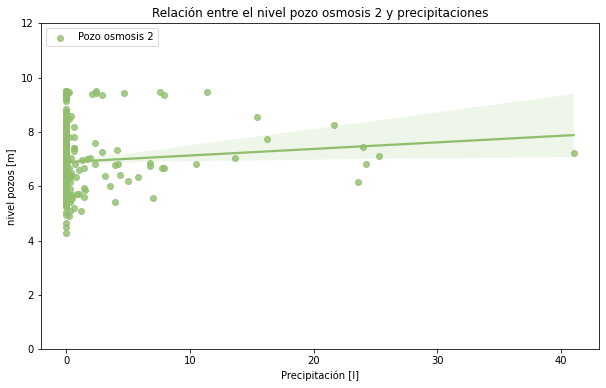

In [ ]:
fig = plt.figure(figsize=(10,6))

ax = sns.regplot(x="prec", y="nMedP3A", color='#90BE6D', data=df_2, label='Pozo osmosis 2')

ax.set_title("Relación entre el nivel pozo osmosis 2 y precipitaciones")
ax.set_xlabel('Precipitación [l]')
ax.set_ylabel('nivel pozos [m]')
ax.legend(loc='upper left')
ax.axis([None, None, 0, 12])

plt.show()

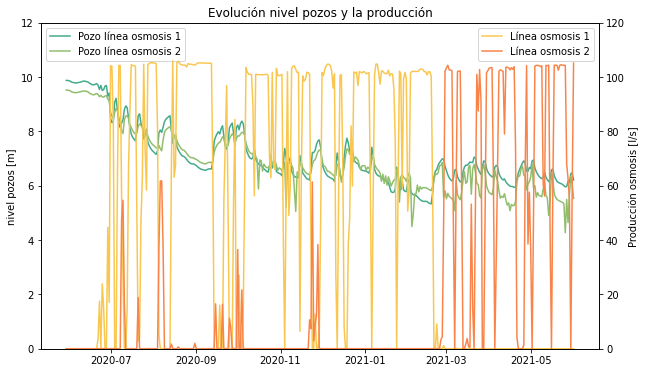

In [ ]:
fig = plt.figure(figsize=(10,6))

ax = sns.lineplot(x="fecha", y="nMedP5", color='#43AA8B', data=df_2, label='Pozo línea osmosis 1')
ax = sns.lineplot(x="fecha", y="nMedP3A", color='#90BE6D', data=df_2, label='Pozo línea osmosis 2')

# Adding Twin Axes
ax2 = ax.twinx() 
ax2 = sns.lineplot(x="fecha", y="cMedOsm1", color='#F9C74F', data=df_2, label='Línea osmosis 1')
ax2 = sns.lineplot(x="fecha", y="cMedOsm2", color='#F9844A', data=df_2, label='Línea osmosis 2')

# Add label

ax.set_title("Evolución nivel pozos y la producción")
ax.set_xlabel('')
ax.set_ylabel('nivel pozos [m]')
ax.legend(loc='upper left')
ax.axis([None, None, 0, 12])

ax2.set_xlabel('')
ax2.set_ylabel('Producción osmosis [l/s]')
ax2.legend(loc='upper right')
ax2.axis([None, None, 0, 120])

plt.show()

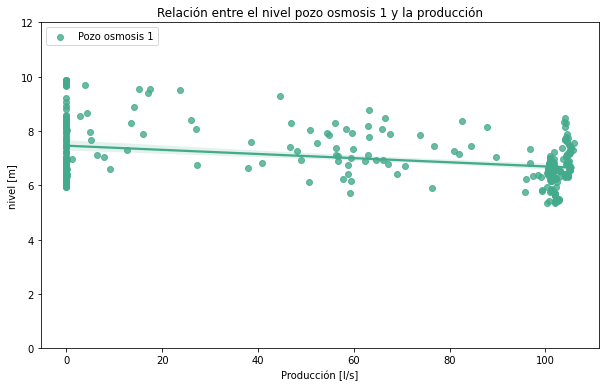

In [ ]:
fig = plt.figure(figsize=(10,6))

ax = sns.regplot(x="cMedOsm1", y="nMedP5", color='#43AA8B', data=df_2, label='Pozo osmosis 1')

ax.set_title("Relación entre el nivel pozo osmosis 1 y la producción")
ax.set_xlabel('Producción [l/s]')
ax.set_ylabel('nivel [m]')
ax.legend(loc='upper left')
ax.axis([None, None, 0, 12])

plt.show()

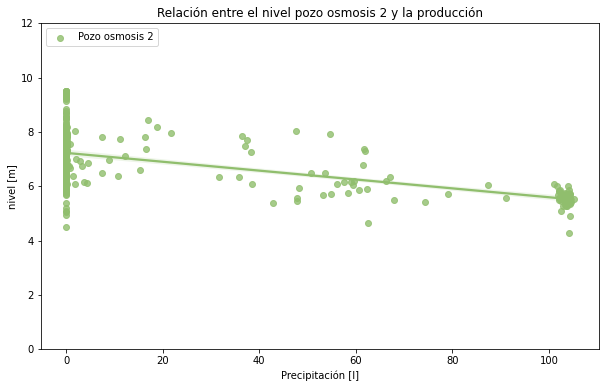

In [ ]:
fig = plt.figure(figsize=(10,6))

ax = sns.regplot(x="cMedOsm2", y="nMedP3A", color='#90BE6D', data=df_2, label='Pozo osmosis 2')

ax.set_title("Relación entre el nivel pozo osmosis 2 y la producción")
ax.set_xlabel('Precipitación [l]')
ax.set_ylabel('nivel [m]')
ax.legend(loc='upper left')
ax.axis([None, None, 0, 12])

plt.show()

<Figure size 1440x1800 with 0 Axes>

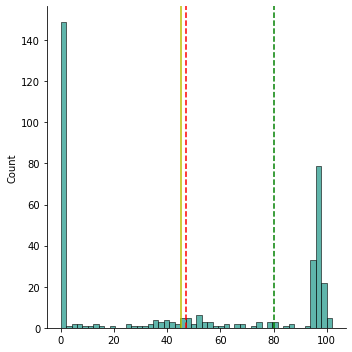

In [ ]:
media_prod_2 = df_2['cMedXarxa'].mean()
mediana_prod_2 = df_2['cMedXarxa'].median()

fig = plt.figure(figsize=(20,25))

ax=sns.displot(df_2["cMedXarxa"].values,bins=50, color='#2A9D8F', label='Suministro [l/s]')

plt.axvline(media_prod_2, color="r", linestyle="--");
plt.axvline(mediana_prod_2, color="y", linestyle="-");
plt.axvline(80, color="g", linestyle="--");

### Consumo

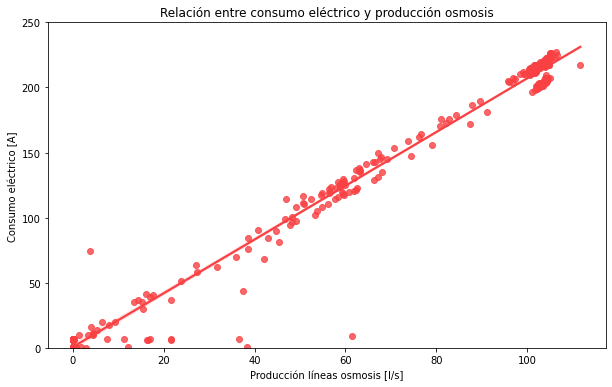

In [ ]:
fig = plt.figure(figsize=(10,6))

ax = sns.regplot(x="cMedOsm", y="iMedOsm", color='#F94144', data=df_2,)

# Add label

ax.set_title("Relación entre consumo eléctrico y producción osmosis")
ax.set_xlabel('Producción líneas osmosis [l/s]')
ax.set_ylabel('Consumo eléctrico [A]')

ax.axis([None, None, 0, 250])

plt.show()

In [ ]:
# Importamos la clase de Regresión Lineal de scikit-learn
from sklearn.linear_model import LinearRegression 

df_iMedOsm = df['iMedOsm']
df_cMedOsm = df['cMedOsm']

x = df_cMedOsm.to_numpy()
y = df_iMedOsm.to_numpy()

regresion_lineal = LinearRegression() # creamos una instancia de LinearRegression

# instruimos a la regresión lineal que aprenda de los datos (x,y)
regresion_lineal.fit(x.reshape(-1,1), y) 

# calculamos el coeficiente de determinación R2
r2 = regresion_lineal.score(x.reshape(-1,1), y)
print('Coeficiente de Determinación R2 = ' + str(r2))

Coeficiente de Determinación R2 = 0.9472995965191315


In [ ]:
# vamos a predicir y = regresion_lineal(80)
nuevo_x = np.array([80]) 
prediccion = regresion_lineal.predict(nuevo_x.reshape(-1,1))
print(prediccion)

[159.96031377]


In [ ]:
# vamos a predicir y = regresion_lineal(100)
nuevo_x = np.array([100]) 
prediccion = regresion_lineal.predict(nuevo_x.reshape(-1,1))
print(prediccion)

[199.63046963]


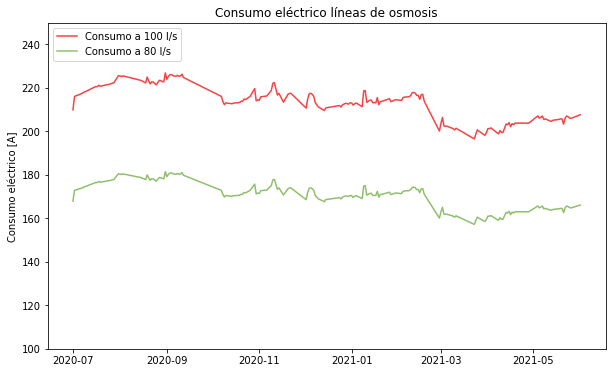

In [ ]:
df_Productius = df_2.loc[(df["cMedOsm"] >= 100.0)]

fig = plt.figure(figsize=(10,6))

ax = sns.lineplot(x="fecha", y="iMedOsm", color='#F94144', data=df_Productius, label='Consumo a 100 l/s')
ax = sns.lineplot(x="fecha", y="iMedOsm80", color='#90BE6D', data=df_Productius, label='Consumo a 80 l/s')

# Add label

ax.set_title("Consumo eléctrico líneas de osmosis")
ax.set_xlabel('')
ax.set_ylabel('Consumo eléctrico [A]')
ax.legend(loc='upper left')
ax.axis([None, None, 100, 250])

plt.show()